# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Oct 6th, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: _Tongfei Li__  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: _1004759460__

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
feature_data = dataset.data
feature_names = dataset.feature_names
feature_data.shape

(569, 30)

In [4]:
target_data = dataset.target
target_names = dataset.target_names

In [5]:

df = DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = target_data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? _30__
* How many observations have a 'mean area' of greater than 700? _171__
* How many participants tested `Malignant`? _212__
* How many participants tested `Benign`? _357__

In [6]:
len(feature_names)

30

In [7]:
count=0
for i in range(len(df['mean area'].values)):
    if df['mean area'].values[i] > 700:
        count+=1
count

171

In [8]:
malignant_samples= len([t for t in target_data if t == 0])
print("%d samples of type malignant" % malignant_samples)

212 samples of type malignant


In [9]:
benign_samples= len([t for t in target_data if t == 1])
print("%d samples of type benign" % benign_samples )

357 samples of type benign


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [10]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.3, random_state=0)
X_train #398*30
#y_train

array([[1.149e+01, 1.459e+01, 7.399e+01, ..., 7.431e-02, 2.941e-01,
        9.180e-02],
       [1.049e+01, 1.861e+01, 6.686e+01, ..., 6.528e-02, 2.213e-01,
        7.842e-02],
       [1.225e+01, 1.794e+01, 7.827e+01, ..., 8.211e-02, 3.113e-01,
        8.132e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




Plot features before standardization

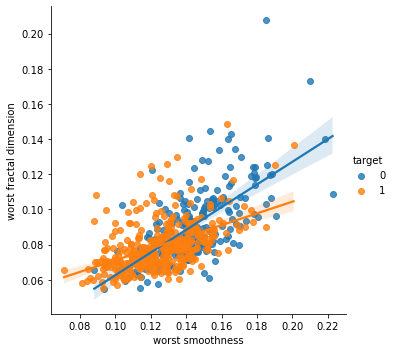

In [19]:
### YOUR CODE HERE ###
import seaborn as sns

sns.lmplot(x='worst smoothness', y='worst fractal dimension',hue="target", data = df)

In [12]:
ws_means = df['worst smoothness'].mean()
ws_std = df['worst smoothness'].std()
wfd_means = df['worst fractal dimension'].mean()
wfd_std = df['worst fractal dimension'].std()

In [13]:
ws_adj = []
ws = df['worst smoothness'].values
for i in range(len(ws)):
    ws_adj.append((ws[i] - ws_means)/ws_std) 
   
df['worst smoothness_std'] = ws_adj

wfd_adj = []
wfd = df['worst fractal dimension'].values
for i in range(len(wfd)):
    wfd_adj.append((wfd[i] - wfd_means)/wfd_std) 
    
df['worst fractal dimension_std'] = wfd_adj
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,worst smoothness_std,worst fractal dimension_std
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1.306537,1.935312
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,-0.375282,0.280943
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0.526944,0.201214
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,3.391291,4.930672
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0.220362,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0.378033,-0.708467
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,-0.690623,-0.973122
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,-0.808876,-0.318129
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1.429169,2.217684


In [14]:
# NOT SURE standardization by target #
# ws_means = df.groupby('target')['worst smoothness'].mean()
# ws_std = df.groupby('target')['worst smoothness'].std() 

In [15]:
# ws_adj = []
# ws = df['worst smoothness'].values
# for i in range(len(ws)):
#     if target_data[i] == 0:
#         ws_adj.append((ws[i] - ws_means[0])/ws_std[0]) 
#     elif target_data[i] == 1:
#         ws_adj.append((ws[i] - ws_means[1])/ws_std[1])
# df['worst smoothness_std'] = ws_adj

In [16]:
# wfd_means = df.groupby('target')['worst fractal dimension'].mean()
# wfd_std = df.groupby('target')['worst fractal dimension'].std()

In [17]:
# wfd_adj = []
# wfd = df['worst fractal dimension'].values
# for i in range(len(wfd)):
#     if target_data[i] == 0:
#         wfd_adj.append((wfd[i] - wfd_means[0])/wfd_std[0]) 
#     elif target_data[i] == 1:
#         wfd_adj.append((wfd[i] - wfd_means[1])/wfd_std[1])
# df['worst fractal dimension_std'] = wfd_adj
# df
## NOT SURE standardization by target ##

Plot features after standardazation

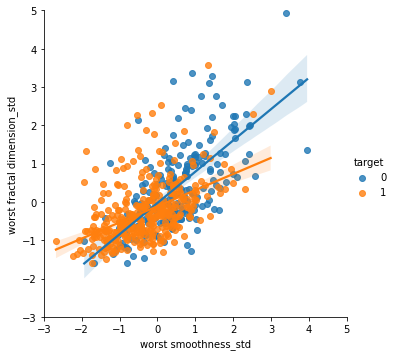

In [20]:
sns.lmplot(x='worst smoothness_std', y='worst fractal dimension_std',hue="target", data = df).set(xlim=(-3, 5), ylim=(-3, 5))

After standardization, the distribution shape of the points looks similar (outliers, density region), but the points are located at different value, the plot is located around the point(0,0). 
They look similar because standardization does not change the related position on value between the points.
The advantage of standardization is to put the variables into same scale, so that they can contribute equally to the measurment of 'nearist neighbour' calculation. 

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




Part2.1.

In [21]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
kk = []
va_acc = []
tr_acc = []
for k in range(1,101):
    kk.append(k)
    knn_k = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn_k, X_train, y_train, cv=5, return_train_score=True)
    va_acc.append(scores['test_score'].mean())
    tr_acc.append(scores['train_score'].mean())



Text(0.5, 0, 'k')

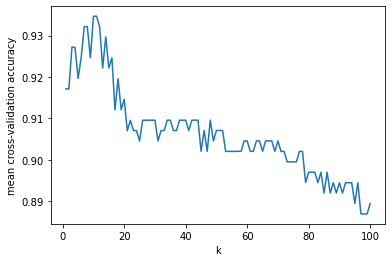

In [22]:
import matplotlib.pyplot as plt
plt.plot(kk,va_acc)
plt.ylabel('mean cross-validation accuracy')
plt.xlabel('k')

From the plot above, we can observe that the mean cross-validation accuracy increased by k from 1 to around 10, decreased dramatically from around 10 to 20, and keep decreasing smoothly from around 20 to 100.

part2.2.

In [23]:
# highest cross-validation accuracy
high_acc = max(va_acc)
# find the index of highest value and find the corresponding k value
best_k = kk[va_acc.index(max(va_acc))]
print('best k:', best_k)
print('highest cross-validation accuracy:', high_acc * 100, '%')

best k: 10
highest cross-validation accuracy: 93.46518987341771 %


part2.3.

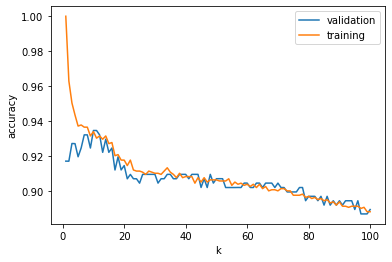

In [24]:
plt.plot(kk,va_acc, label = "validation")
plt.plot(kk,tr_acc, label = "training")
plt.ylabel('accuracy')
plt.xlabel('k')
plt.legend()
plt.show()

Comment: 
value of k from 1 to around 8 leads to overfitting, since accuracy of training set is too high, and accuracy of validation is too low, which means that the model is affected too much by outliers signals. 
value of k larger than 15 leads to underfitting, since accuracy of both validation and trainning sets are decreasing, which means that the model doesn't capture enough signals from the dataset.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [29]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
importance = dt.feature_importances_
importance
#np.argmin(importance)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02112487, 0.        , 0.01815419, 0.        ,
       0.        , 0.        , 0.        , 0.04749283, 0.01058659,
       0.        , 0.        , 0.        , 0.        , 0.01016418,
       0.        , 0.02784245, 0.        , 0.08615112, 0.00990228,
       0.        , 0.01032055, 0.728114  , 0.03014695, 0.        ])

In [32]:
def Feature_selector (X_train , y_train , tr=0.95):
    ### YOUR CODE HERE ###
    fname = feature_names
    #print(fname)
    removed_features = []
    cv_acc = []
    best_k = []
    cur_acc = high_acc
    
    dt = tree.DecisionTreeClassifier(random_state=0)
    dt.fit(X_train,y_train)
    importance = dt.feature_importances_
    
    while (len(removed_features) < 29) and (cur_acc >= tr * high_acc):
        # find the current index of least importance 
        to_remove = np.argmin(importance)
        #print('imp',importance[to_remove])
        # delete from importance
        importance = np.delete(importance, to_remove, 0)
        # add the removed feature to list and delete from featurenames
        removed_features.append(fname[to_remove])
        #print('toremove:',fname[to_remove])
        fname = np.delete(fname, to_remove, 0)
        #print('len fname:',len(fname))
        # remove from train dataset
        X_train = np.delete(X_train, to_remove, 1)
        #print(len(X_train[0]))
        # find the best mean cv score and correspond k
        kk = []
        va_acc = []
        for k in range(1,101):
            kk.append(k)
            knn_k = neighbors.KNeighborsClassifier(n_neighbors=k)
            scores = cross_validate(knn_k, X_train, y_train, cv=5, return_train_score=True)
            va_acc.append(scores['test_score'].mean())
        # update current accuracy
        cur_acc = max(va_acc)
        #print(cur_acc)
        # add highest cross-validation accuracy and corres k
        cv_acc.append(cur_acc) 
        best_k.append(kk[va_acc.index(max(va_acc))]) 
        
        

    return removed_features,cv_acc, best_k

In [33]:
output = Feature_selector(X_train , y_train)
output

(['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concave points',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'worst radius',
  'worst perimeter',
  'worst compactness',
  'worst fractal dimension',
  'worst smoothness',
  'fractal dimension error',
  'worst concavity',
  'smoothness error',
  'mean symmetry',
  'mean concavity',
  'worst texture',
  'worst symmetry',
  'area error',
  'worst area'],
 [0.9346518987341772,
  0.9346518987341772,
  0.9321518987341773,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145886075949367,
  0.9145569620253164,
  0.914556962025

Text(0, 0.5, 'mean cross validation accuracy')

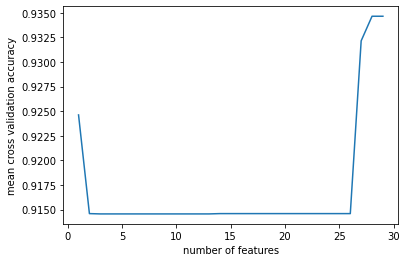

In [34]:
# visualization
xval = list(range(1, 30))
yval = output[1][::-1]
plt.plot(xval,yval)
plt.xlabel('number of features')
plt.ylabel('mean cross validation accuracy')

Text(0, 0.5, 'best value of k')

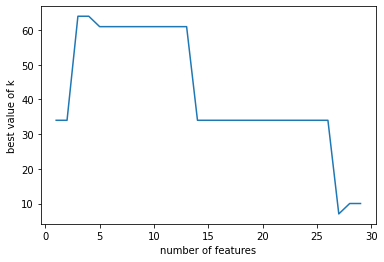

In [35]:
# Plot the best value of k (y-axis) vs. the number of features
yval = output[2][::-1]
plt.plot(xval,yval)
plt.xlabel('number of features')
plt.ylabel('best value of k')

State what is the number of essential features for classification and justify your answer:
    
the number of essential feature is 1 according to my output

In [36]:
# number of all features - number of removed features = number of essential features
len(feature_names)-len(output[0])

1

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


part4.1. standardization

In [37]:
### YOUR CODE HERE ###
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
Xt_scaled = scaler.transform(X_test)

part4.2.

In [38]:
output2 = Feature_selector(X_scaled , y_train)

In [39]:
output2

(['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concave points',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'worst radius',
  'worst perimeter',
  'worst compactness',
  'worst fractal dimension',
  'worst smoothness',
  'fractal dimension error',
  'worst concavity',
  'smoothness error',
  'mean symmetry',
  'mean concavity',
  'worst texture',
  'worst symmetry',
  'area error',
  'worst area'],
 [0.9649683544303798,
  0.9623417721518986,
  0.9598417721518986,
  0.9598417721518988,
  0.9572468354430381,
  0.9623417721518986,
  0.9598101265822784,
  0.9598417721518986,
  0.9573417721518988,
  0.9598101265822784,
  0.9599050632911392,
  0.9623101265822784,
  0.9598101265822784,
  0.9648417721518987,
  0.9674050632911392,
  0.9623101265822784,
  0.9547151898734179,
  0.952246835443

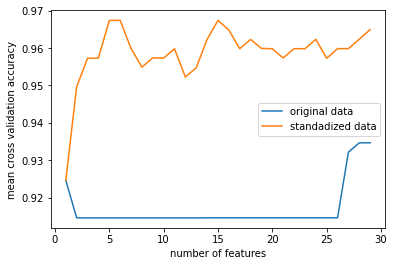

In [40]:
xval = list(range(1, 30))
yval = output[1][::-1]
yval_stan = output2[1][::-1]
plt.plot(xval,yval,label = "original data")
plt.plot(xval,yval_stan, label = "standadized data")
plt.xlabel('number of features')
plt.ylabel('mean cross validation accuracy')
plt.legend()
plt.show()

part4.3. Discuss: 
From the above graph, standadized data significantly increase cross validation accuracy for all number of features.
Standardization helps our model to get higher cross validation accuracy, the model perform better in cv after standardization.


In [41]:
print("Below is the case lead to high accuracy:")
print('highest mean cross-validation accuracy after standardization:', max(output2[1]) * 100, '%')
print('with number of features:', 30-xval[output2[1].index(max(output2[1]))])
print('with features:', output2[0][output2[1].index(max(output2[1]))+1:]+['worst concave points'])
print('k value:', output2[2][output2[1].index(max(output2[1]))])

Below is the case lead to high accuracy:
highest mean cross-validation accuracy after standardization: 96.74367088607593 %
with number of features: 6
with features: ['mean concavity', 'worst texture', 'worst symmetry', 'area error', 'worst area', 'worst concave points']
k value: 4


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [42]:
# import 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [43]:
### YOUR CODE HERE ###
# mean crosss vaalidation score
dt_cv = []
# correspond depth and split
dt_ind = []
for dep in range(2,20):
    for split in range(2,20):
        clf = DecisionTreeClassifier(random_state=0,max_depth=dep,min_samples_split=split)
        dt_cv.append(cross_val_score(clf, X_scaled, y_train, cv=5).mean())
        dt_ind.append([dep,split])



In [44]:
print('highest mean cross-validation accuracy:', max(dt_cv) * 100, '%')
print('with max depth:', dt_ind[dt_cv.index(max(dt_cv))][0])
print('min sample split:', dt_ind[dt_cv.index(max(dt_cv))][1])


highest mean cross-validation accuracy: 93.21518987341773 %
with max depth: 5
min sample split: 8


Here we want to perform KNN again, but on standardization dataset, so that the comparizon is more trustable.

In [46]:
kk = []
va_acc = []
tr_acc = []

for k in range(1,101):
    kk.append(k)
    knn_k = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn_k, X_scaled, y_train, cv=5, return_train_score=True)
    va_acc.append(scores['test_score'].mean())
    tr_acc.append(scores['train_score'].mean())
    
# highest cross-validation accuracy
high_acc = max(va_acc)
# find the index of highest value and find the corresponding k value
best_k = kk[va_acc.index(max(va_acc))]
print('best k:', best_k)
print('highest cross-validation accuracy:', high_acc * 100, '%')

best k: 10
highest cross-validation accuracy: 96.74367088607593 %


KNN method: highest cv accuracy: 96.74367088607593 %, which is significantly higher than decision tree classifier (93.21518987341773 %), so in this case, KNN classifier has better performance.

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Since KNN classifier with k=10 neighbours has best performance on cross validation process, I choose this model for testing.

In [49]:
from sklearn.metrics import accuracy_score
# create classifier
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
# fit trained data into classifier
knn_10.fit(X_train, y_train)
# calculate accuracy based on test data
accuracy = accuracy_score(y_test, knn_10.predict(X_test))
print ("Test set accuracy without standardization: ", accuracy * 100, "%")


# # fit trained data into classifier
# knn_10.fit(X_scaled, y_train)
# # calculate accuracy based on test data
# accuracy = accuracy_score(y_test, knn_10.predict(Xt_scaled))
# print ("Test set accuracy with standaardization: ", accuracy * 100, "%")


Test set accuracy without standardization:  95.32163742690058 %


The accuracy for predicting new data of our model performs well (with more than 95% accuracy), so I would say that this model is a good fit for our dataset.

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/